In [ ]:
from anisotropy import run_SEPevent

import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from scipy.stats import norm

from itertools import product
import copy

SOLO_SECTORS = ["sun", "asun", "north", "south"]
WIND_SECTORS = [f"P{i}" for i in range(8)]

SOLO_START = dt.datetime(2020, 11, 2)       # first day of available data from SOLO mission
SOLO_END = dt.datetime(2025, 5, 31)

In [ ]:
def get_sectors(sc):
    if sc.lower() == "solo":
        return SOLO_SECTORS

    elif sc.lower() == "wind":
        return WIND_SECTORS

def convert_to_bool_coverage(cov, sc, bin_width_deg=1):
    directions = get_sectors(sc)
    
    X, Y = np.meshgrid(cov.index.values, np.linspace(0, 180, int(180 / bin_width_deg)), indexing="ij")
    cov_arr = np.zeros_like(Y, dtype=np.bool_)

    for direction in directions:
        dataf = cov[direction].mask(cov[direction].isna(), -1)     # replace missing values with -1 to exclude from comparison in the loop
        for index, data in dataf.reset_index().iterrows():
            covered = np.ma.masked_inside(Y[index], data["min"], data["max"])
            cov_arr[index] = cov_arr[index] | covered.mask

    return X, Y, cov_arr

def coverage_overlap(cov1, cov2):   # TODO handle mismatch (remove from coverage with higher amount of timestamps) (this is due to timestamp-based indexing)
    return cov1 & cov2

def intensity_histogram(sc, I_data, coverage):
    """
    Code partly adapted from SOLER anisotropy tools SEPEvent.overview_plot() method (maintained by Jan Gieseler)
    https://github.com/soler-he/sep_tools/tree/main/anisotropy commit 7567a98
    """ 
    intensity = copy.copy(I_data)
    sectors = get_sectors(sc)

    X, Y = np.meshgrid(coverage.index.values, np.arange(180)+1)
    hist = np.zeros(np.shape(X))
    hist_counts = np.zeros(np.shape(X))

    for i, direction in enumerate(sectors):
        intensity_per_sector = intensity[:,i]
        cov_arr = coverage[direction].to_numpy()
        cov_finite = coverage[direction].notna().to_numpy()
        av_flux = np.where(cov_finite[:,1], intensity_per_sector, np.nan)   # np.nan == True in the context of np.where, but in comparisons always false
        new_hist = np.where(((Y > cov_arr[:,0]) & (Y < cov_arr[:,2])), av_flux, 0)
        hist = hist + new_hist
        hist_counts = hist_counts + np.where(new_hist > 0, 1, 0)

    hist = hist / hist_counts
    hist = np.where(hist > 0, hist, np.nan)

    return hist

In [ ]:
# Irrelevant here
data_path = f"{os.getcwd()}{os.sep}data"

species = "e"
channels = [14,18]
averaging = "1min"

solo_start = pd.to_datetime('2023-10-30 00:00:00')
solo_end = pd.to_datetime('2023-11-01 00:00:00')
wind_start = pd.to_datetime('2021-10-28 00:00:00')
wind_end = pd.to_datetime('2021-10-30 00:00:00')

solo_event = run_SEPevent(data_path, "Solar Orbiter EPT", solo_start, solo_end, species, channels=channels, averaging=averaging)
wind_event = run_SEPevent(data_path, "Wind 3DP", wind_start, wind_end, species, channels=3, averaging=averaging)

solo_event.overview_plot()

Input was Wind, using Wind.
Spacecraft: Wind
Instrument: 3DP. Species: e. Channels: 3.


02-Dec-25 13:08:03: File is current: /home/osant/gradu/data/wind_masters/wi_h0_mfi_00000000_v01.cdf
02-Dec-25 13:08:03: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/wind/mfi/mfi_h0/2012/
02-Dec-25 13:08:02: File is current: /home/osant/gradu/data/mfi/mfi_h0/2012/wi_h0_mfi_20120123_v05.cdf
02-Dec-25 13:08:04: File is current: /home/osant/gradu/data/mfi/mfi_h0/2012/wi_h0_mfi_20120124_v05.cdf


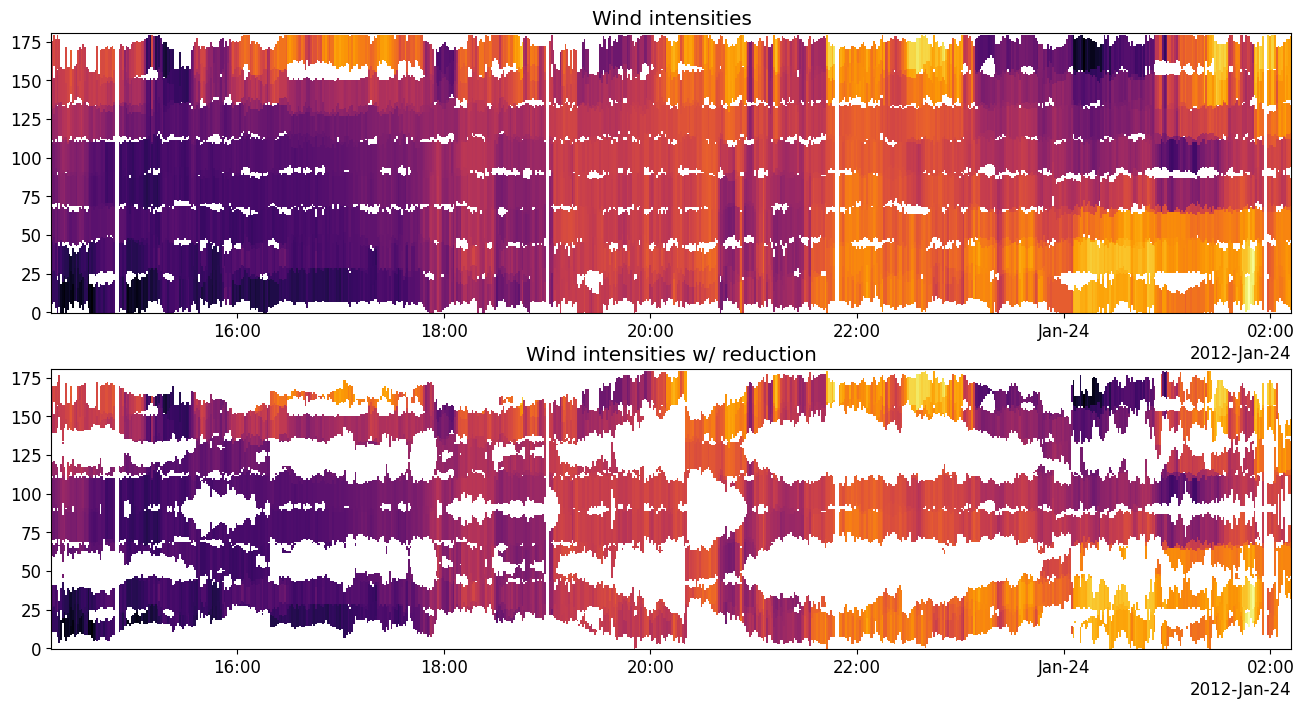

Input was Wind, using Wind.
Spacecraft: Wind
Instrument: 3DP. Species: e. Channels: 3.


02-Dec-25 13:08:15: File is current: /home/osant/gradu/data/wind_masters/wi_h0_mfi_00000000_v01.cdf
02-Dec-25 13:08:15: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/wind/mfi/mfi_h0/2012/
02-Dec-25 13:08:17: File is current: /home/osant/gradu/data/mfi/mfi_h0/2012/wi_h0_mfi_20120124_v05.cdf


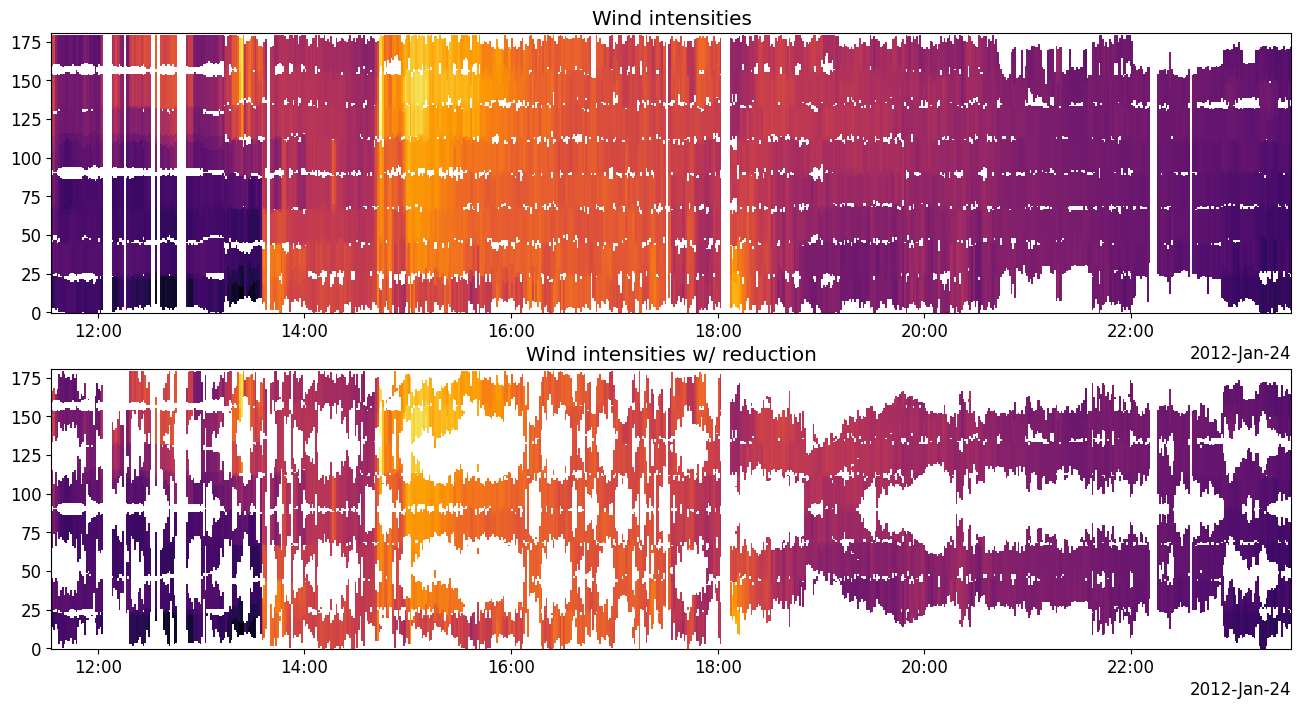

Input was Wind, using Wind.
Spacecraft: Wind
Instrument: 3DP. Species: e. Channels: 3.


02-Dec-25 13:08:26: File is current: /home/osant/gradu/data/wind_masters/wi_h0_mfi_00000000_v01.cdf
02-Dec-25 13:08:26: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/wind/mfi/mfi_h0/2012/
02-Dec-25 13:08:28: File is current: /home/osant/gradu/data/mfi/mfi_h0/2012/wi_h0_mfi_20120307_v05.cdf


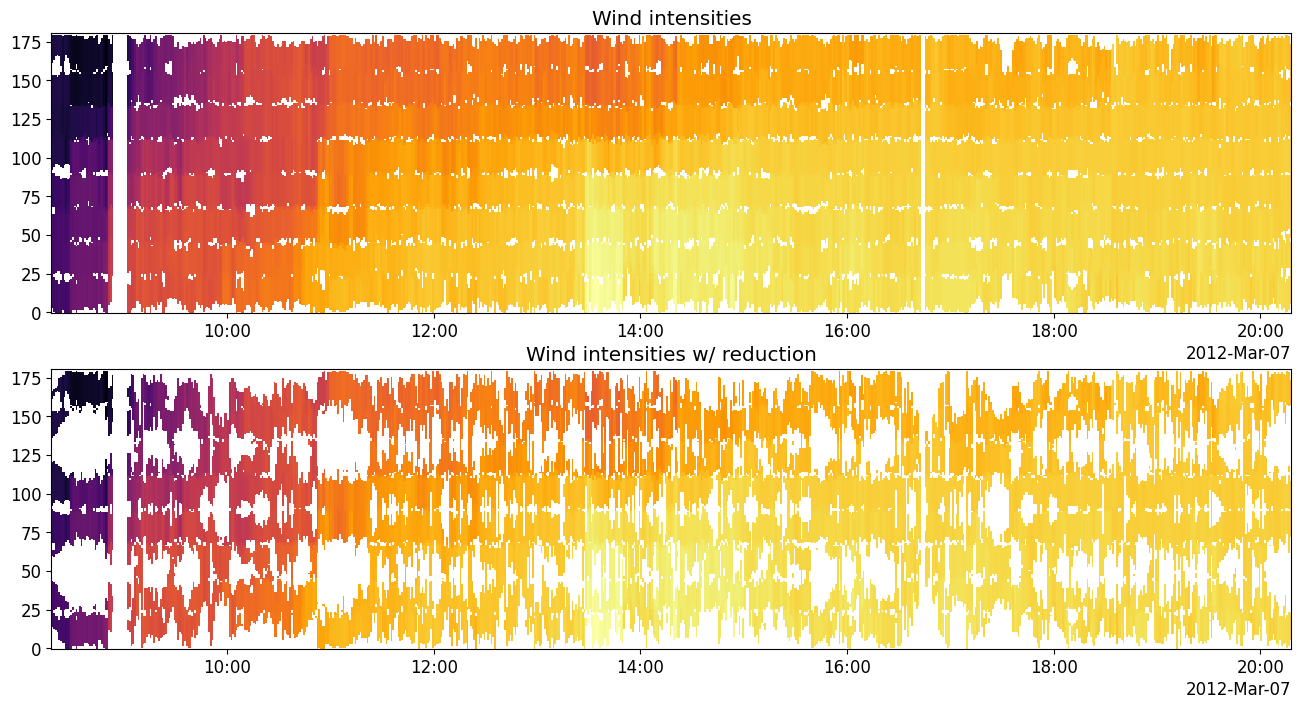

Input was Wind, using Wind.
Spacecraft: Wind
Instrument: 3DP. Species: e. Channels: 3.


02-Dec-25 13:08:35: File is current: /home/osant/gradu/data/wind_masters/wi_h0_mfi_00000000_v01.cdf
02-Dec-25 13:08:35: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/wind/mfi/mfi_h0/2012/
02-Dec-25 13:08:36: File is current: /home/osant/gradu/data/mfi/mfi_h0/2012/wi_h0_mfi_20120714_v05.cdf
02-Dec-25 13:08:38: File is current: /home/osant/gradu/data/mfi/mfi_h0/2012/wi_h0_mfi_20120715_v05.cdf


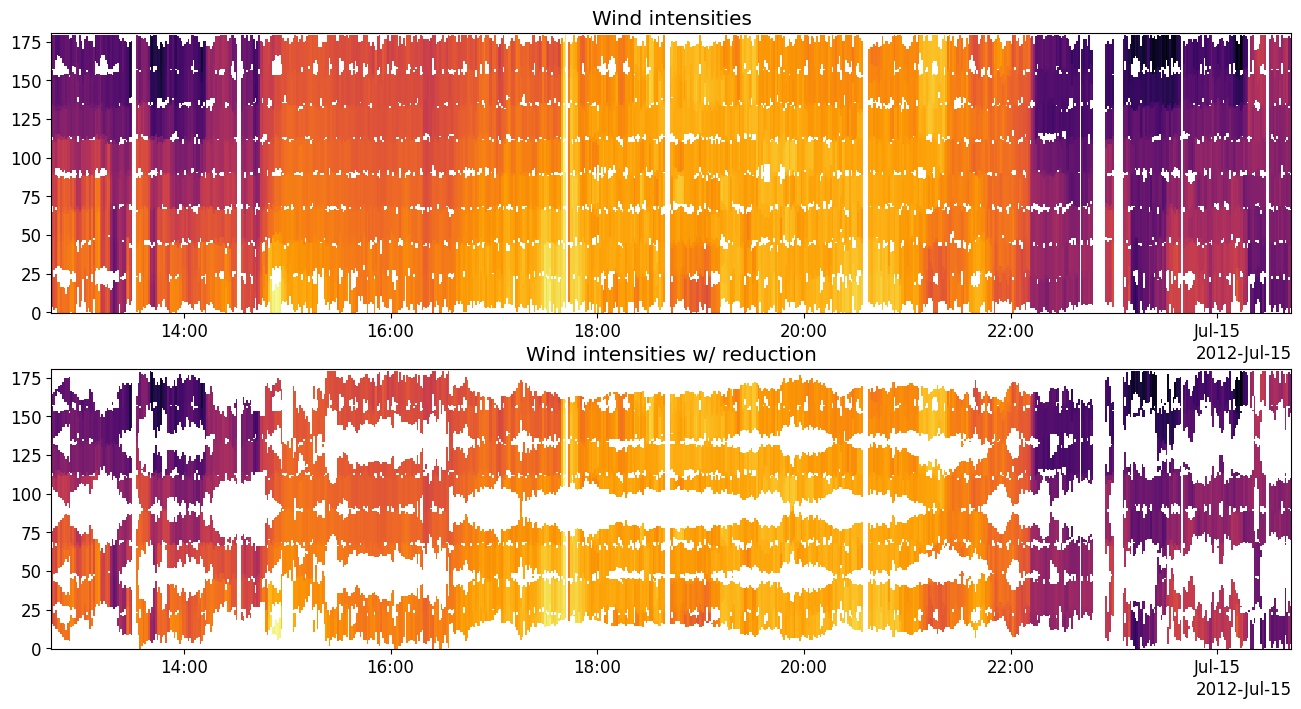

Input was Wind, using Wind.
Spacecraft: Wind
Instrument: 3DP. Species: e. Channels: 3.


02-Dec-25 13:08:49: File is current: /home/osant/gradu/data/wind_masters/wi_h0_mfi_00000000_v01.cdf
02-Dec-25 13:08:49: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/wind/mfi/mfi_h0/2012/
02-Dec-25 13:08:54: File is current: /home/osant/gradu/data/mfi/mfi_h0/2012/wi_h0_mfi_20120903_v05.cdf


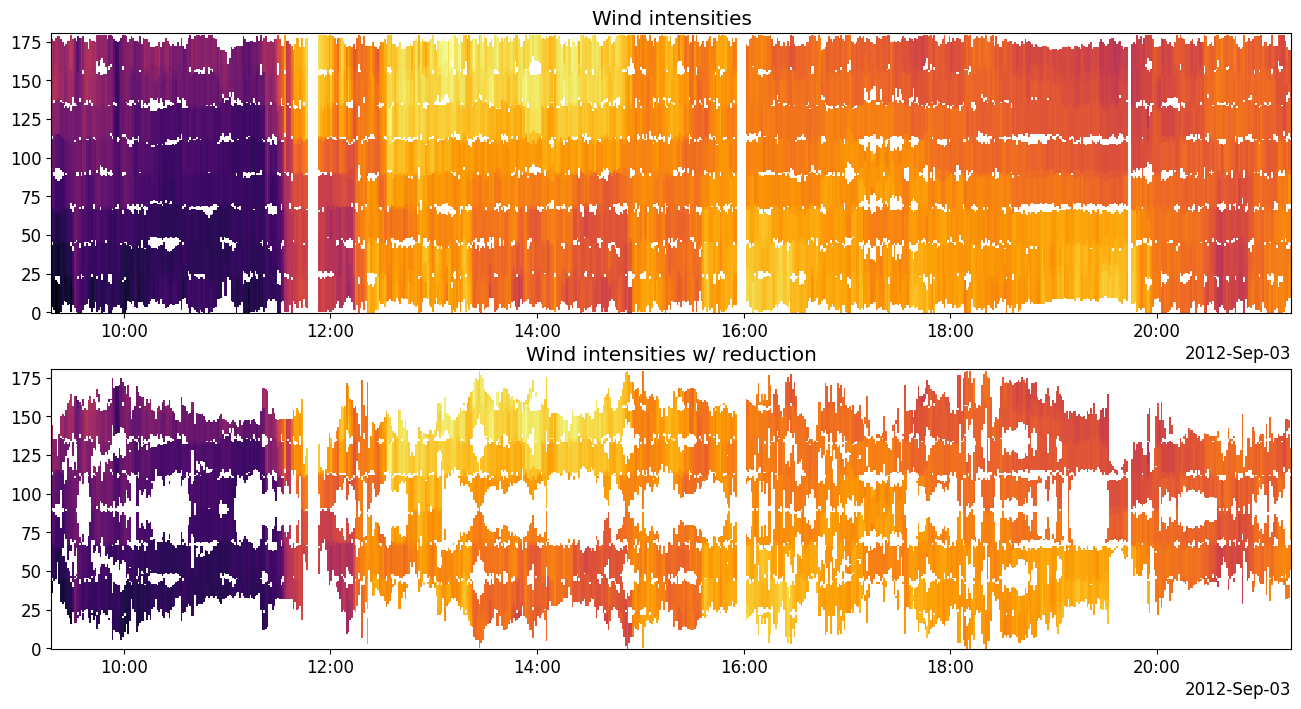

Input was Wind, using Wind.
Spacecraft: Wind
Instrument: 3DP. Species: e. Channels: 3.


02-Dec-25 13:09:03: File is current: /home/osant/gradu/data/wind_masters/wi_h0_mfi_00000000_v01.cdf
02-Dec-25 13:09:03: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/wind/mfi/mfi_h0/2012/
02-Dec-25 13:09:06: File is current: /home/osant/gradu/data/mfi/mfi_h0/2012/wi_h0_mfi_20120720_v05.cdf


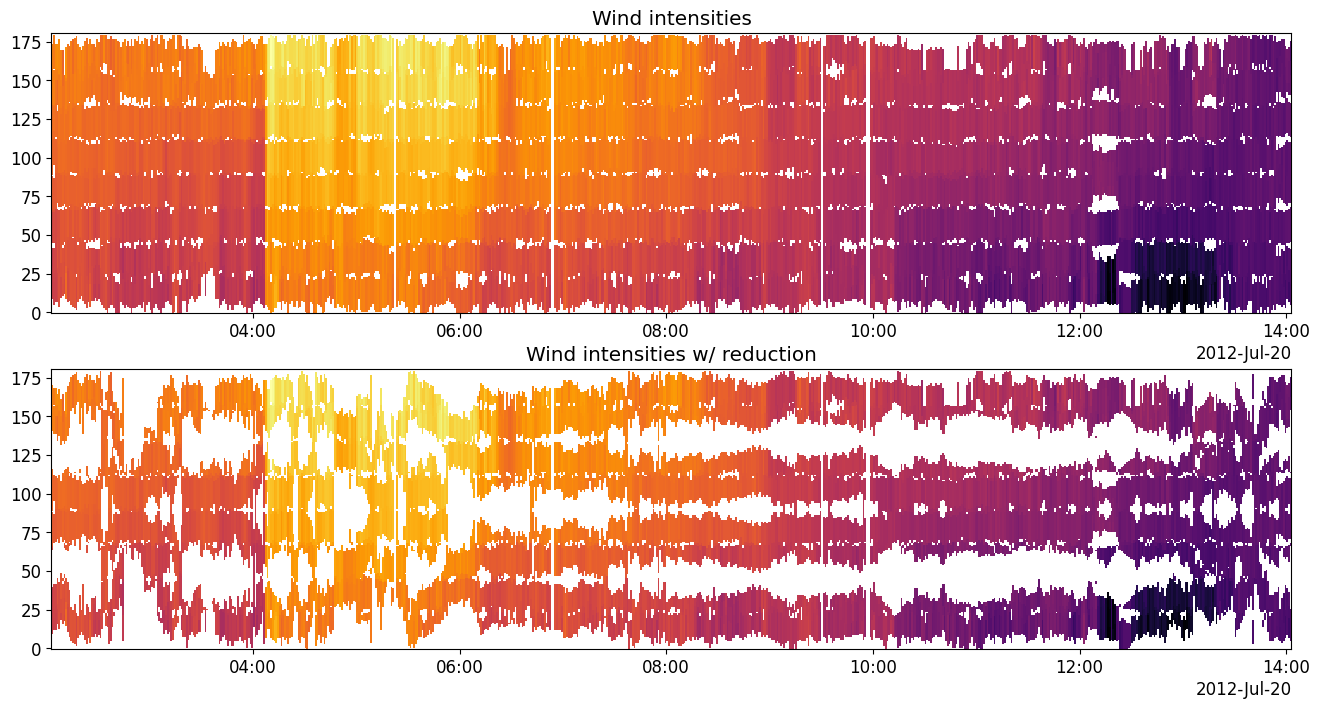

Input was Wind, using Wind.
Spacecraft: Wind
Instrument: 3DP. Species: e. Channels: 3.


02-Dec-25 13:09:15: File is current: /home/osant/gradu/data/wind_masters/wi_h0_mfi_00000000_v01.cdf
02-Dec-25 13:09:15: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/wind/mfi/mfi_h0/2012/
02-Dec-25 13:09:17: File is current: /home/osant/gradu/data/mfi/mfi_h0/2012/wi_h0_mfi_20120128_v05.cdf


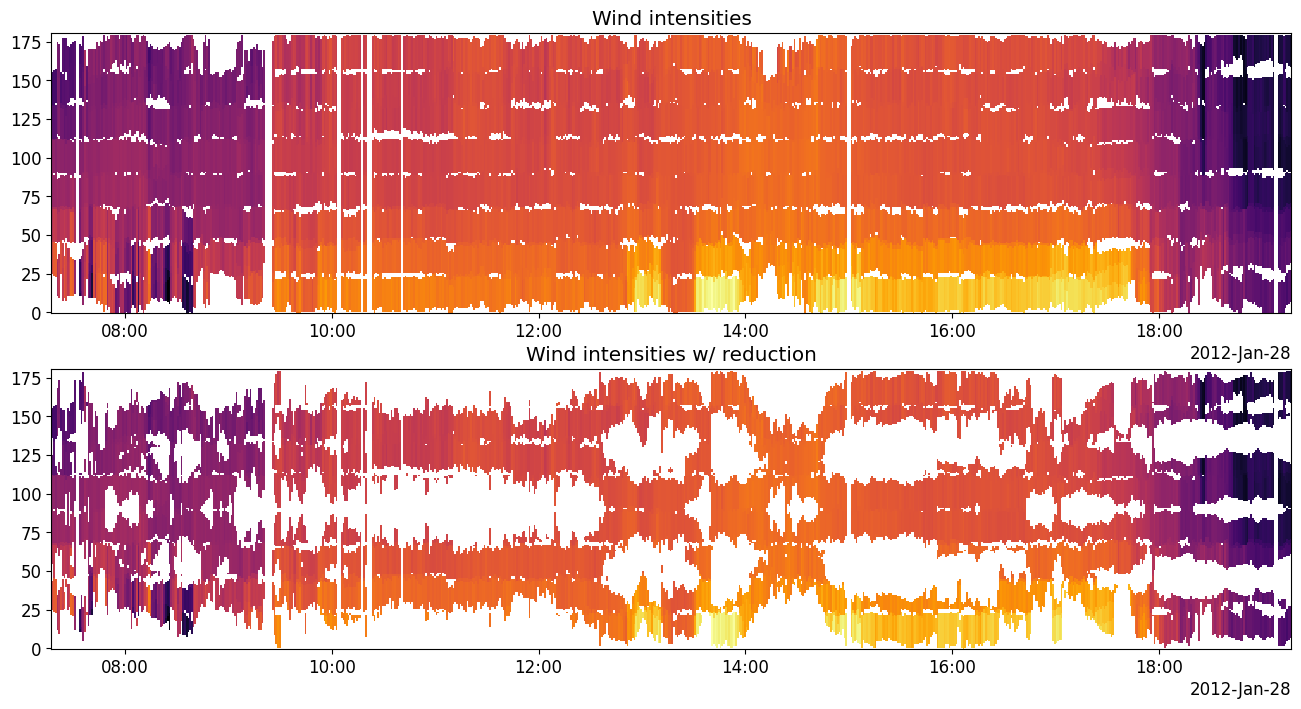

Input was Wind, using Wind.
Spacecraft: Wind
Instrument: 3DP. Species: e. Channels: 3.


02-Dec-25 13:09:27: File is current: /home/osant/gradu/data/wind_masters/wi_h0_mfi_00000000_v01.cdf
02-Dec-25 13:09:27: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/wind/mfi/mfi_h0/2012/
02-Dec-25 13:09:28: File is current: /home/osant/gradu/data/mfi/mfi_h0/2012/wi_h0_mfi_20120516_v05.cdf
02-Dec-25 13:09:30: File is current: /home/osant/gradu/data/mfi/mfi_h0/2012/wi_h0_mfi_20120517_v05.cdf


ValueError: operands could not be broadcast together with shapes (720,180) (721,180) 

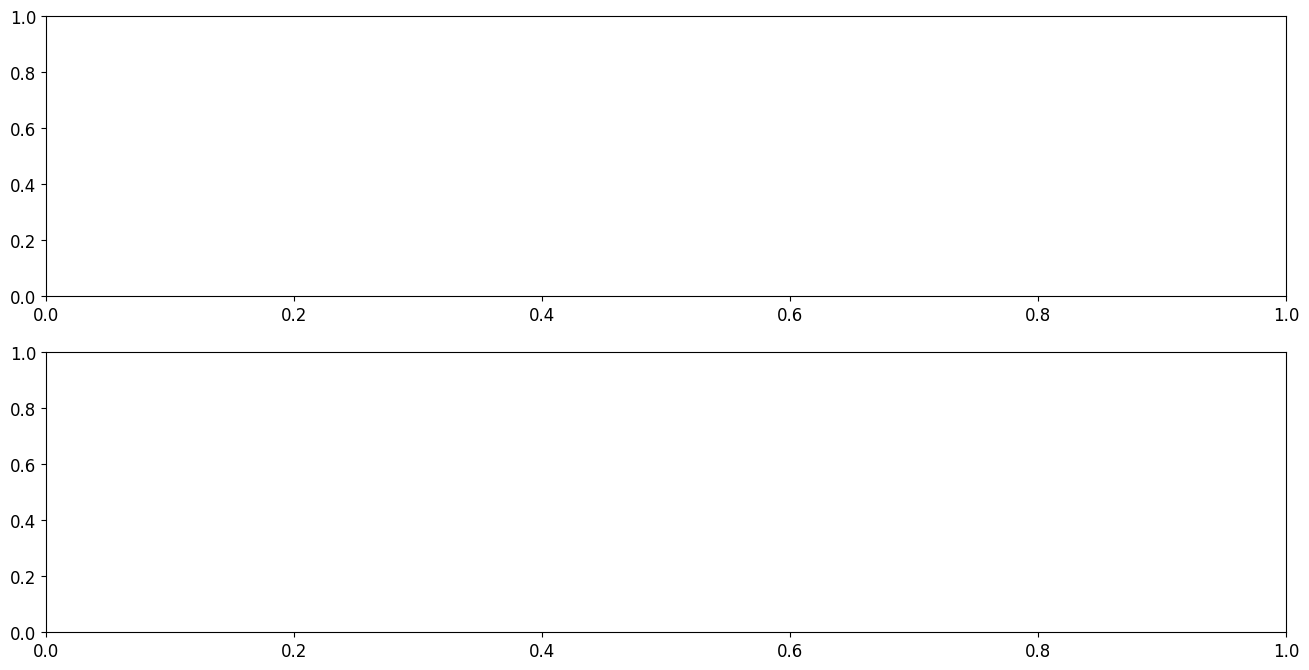

In [ ]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

from matplotlib.colors import LogNorm
from time import sleep
from IPython.display import clear_output

def load_random_coverage(sc, path):
    r_file = np.random.choice(os.listdir(path)).tolist()
    return np.load(path + os.sep + r_file)


def load_wind_event(df, *args, remove_peaks=False, n_lim=2, **kwargs):
    wind_event = run_SEPevent(*args, **kwargs)
    if remove_peaks:
        wind_event.wind_peak_removal(n_lim=n_lim)
    return wind_event

df = pd.read_csv("aipad_events_test.csv", delimiter=";")

bin_width_deg = 1
i = 0

while i < 10:
    solo_cov = load_random_coverage("solo", "coverages/solo")
    X, Y = np.meshgrid(np.arange(len(solo_cov[0,:])), np.arange(len(solo_cov[:,0])))

    fig, axs = plt.subplots(nrows=2, figsize=(16,8))

    data_path = f"{os.getcwd()}{os.sep}data"

    onset_dt = pd.to_datetime(df.iloc[i,1]) + pd.to_timedelta(df.iloc[i,2])

    start = onset_dt - pd.Timedelta(hours=2)
    end = onset_dt + pd.Timedelta(hours=10)

    wind_event = load_wind_event(df, data_path, "Wind 3DP", start, end, "e", channels=3, averaging="1min")
    wind_cov = wind_event.coverage
    X2, Y2, wind_cov_bool = convert_to_bool_coverage(wind_cov, "wind", bin_width_deg=bin_width_deg)

    cov_arr = coverage_overlap(solo_cov, wind_cov_bool)

    hist = intensity_histogram("Wind", wind_event.I_data, wind_cov)
    hist_min = np.nanmin(hist)
    hist_max = np.nanmax(hist)

    axs[0].pcolormesh(X2, Y2, np.where(wind_cov_bool == True, hist.T, 0), norm=LogNorm(hist_min, hist_max), cmap="inferno")
    axs[0].set_title("Wind intensities")
    axs[1].pcolormesh(X2, Y2, np.where(cov_arr == True, hist.T, 0), norm=LogNorm(hist_min, hist_max), cmap="inferno")
    axs[1].set_title("Wind intensities w/ reduction")
    plt.show()

    i += 1